In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [2]:
# считываем данные и заполняем общий датасет
positive = pd.read_csv('positive.csv', sep=';', usecols=[3], names=['text'])
positive['label'] = ['positive'] * len(positive)
negative = pd.read_csv('negative.csv', sep=';', usecols=[3], names=['text'])
negative['label'] = ['negative'] * len(negative)
df = positive.append(negative)

/var/folders/g_/9v3q8zfn4dj84j48wgjpsd7c0000gn/T/ipykernel_1530/3125191635.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = positive.append(negative)


In [3]:
df.tail()

,text,label
111918,Но не каждый хочет что то исправлять:( http://...,negative
111919,скучаю так :-( только @taaannyaaa вправляет мо...,negative
111920,"Вот и в школу, в говно это идти уже надо(",negative
111921,"RT @_Them__: @LisaBeroud Тауриэль, не грусти :...",negative
111922,Такси везет меня на работу. Раздумываю приплат...,negative


№ 1.

In [4]:
x_train, x_test, y_train, y_test = train_test_split(df.text, df.label)

In [5]:
from sklearn.linear_model import LogisticRegression 
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
from nltk import ngrams
import nltk
from nltk import collocations 
from nltk.tokenize import word_tokenize, wordpunct_tokenize
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('genesis')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/evamelissatasdemir/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package genesis to
[nltk_data]     /Users/evamelissatasdemir/nltk_data...
[nltk_data]   Package genesis is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/evamelissatasdemir/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
from string import punctuation
noise = stopwords.words('russian') + list(punctuation)

In [8]:
from collections import Counter

In [9]:
corpus = [token for tweet in df.text for token in word_tokenize(tweet) if token not in punctuation]
print(len(corpus))
corpus[:30]

2870536


['first_timee',
 'хоть',
 'я',
 'и',
 'школота',
 'но',
 'поверь',
 'у',
 'нас',
 'то',
 'же',
 'самое',
 'D',
 'общество',
 'профилирующий',
 'предмет',
 'типа',
 'Да',
 'все-таки',
 'он',
 'немного',
 'похож',
 'на',
 'него',
 'Но',
 'мой',
 'мальчик',
 'все',
 'равно',
 'лучше']

In [10]:
freq_dict = Counter(corpus)
freq_dict_sorted= sorted(freq_dict.items(), key=lambda x: -x[1])
list(freq_dict_sorted)[:30]

[('не', 69472),
 ('и', 55166),
 ('в', 52902),
 ('я', 52818),
 ('RT', 38070),
 ('на', 35759),
 ('http', 32998),
 ('что', 31541),
 ('с', 27217),
 ('а', 26860),
 ('...', 22363),
 ('меня', 20656),
 ('у', 18928),
 ('как', 18279),
 ('так', 16839),
 ('D', 16575),
 ('это', 16542),
 ('мне', 16337),
 ('все', 14763),
 ('ты', 13412),
 ('но', 12949),
 ("''", 12471),
 ('Я', 12315),
 ('``', 11467),
 ('то', 11432),
 ('..', 11392),
 ('по', 11294),
 ('уже', 10180),
 ('за', 10038),
 ('же', 9628)]

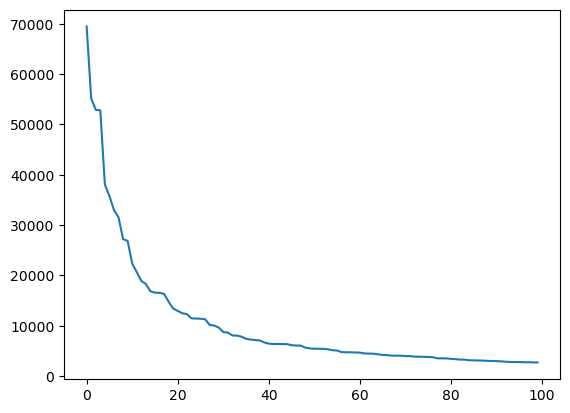

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

first_part_freqs = [freq for word, freq in freq_dict_sorted[:100]]
plt.plot(first_part_freqs)
plt.show()

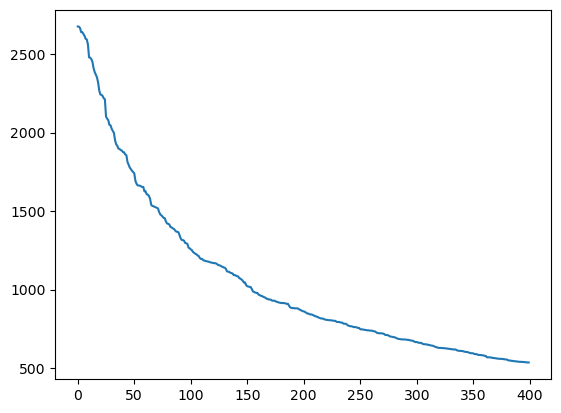

In [12]:
first_part_freqs = [freq for word, freq in freq_dict_sorted[100:500]]
plt.plot(first_part_freqs)
plt.show()

In [14]:
# Подготовим три группы токенов: с высокой, средней и низкой частотой

high_tokens = set()
med_tokens = set()
lit_tokens = set()
h = 17000 # если частота выше этого значения будем считать что это токен с высокой частотой. Выбор согласно графиков на предыдущих шагах.
m = 1000 # если частота ниже этого значения будем считать что это токен с низкой частотой. Выбор согласно графиков на предыдущих шагах.
for i in freq_dict_sorted:
    if i[1] > h:
        high_tokens.add(i[0])
    elif i[1] < m:
        lit_tokens.add(i[0])
    else:
        med_tokens.add(i[0])
print(len(high_tokens),len(med_tokens),len(lit_tokens))    

14 241 350868
14 241 350868


In [15]:
# создадим фильтр (стопслова) с добавлением токенов средней и низкой частоты, 
# то есть будем считать только по токенам с высокой частотой
sw = noise + list(lit_tokens) + list(med_tokens)

In [16]:
import warnings
warnings.filterwarnings("ignore")

In [17]:
%%time
vec = CountVectorizer(ngram_range=(1, 1), tokenizer=word_tokenize, stop_words=sw)
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

    negative       0.87      0.57      0.69     43003
    positive       0.35      0.73      0.47     13706

    accuracy                           0.61     56709
   macro avg       0.61      0.65      0.58     56709
weighted avg       0.74      0.61      0.63     56709

Wall time: 57.8 s
              precision    recall  f1-score   support

    negative       0.87      0.57      0.69     43003
    positive       0.35      0.73      0.47     13706

    accuracy                           0.61     56709
   macro avg       0.61      0.65      0.58     56709
weighted avg       0.74      0.61      0.63     56709

Wall time: 57.8 s


In [18]:
# посчитаем только по токенам с средней частотой
sw = noise + list(high_tokens) + list(lit_tokens)

In [19]:
%%time
vec = CountVectorizer(ngram_range=(1, 1), tokenizer=word_tokenize, stop_words=sw)
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

    negative       0.48      0.67      0.56     20114
    positive       0.77      0.60      0.67     36595

    accuracy                           0.62     56709
   macro avg       0.62      0.63      0.62     56709
weighted avg       0.67      0.62      0.63     56709

Wall time: 59.4 s
              precision    recall  f1-score   support

    negative       0.48      0.67      0.56     20114
    positive       0.77      0.60      0.67     36595

    accuracy                           0.62     56709
   macro avg       0.62      0.63      0.62     56709
weighted avg       0.67      0.62      0.63     56709

Wall time: 59.4 s


In [20]:
# посчитаем только по токенам с низкой частотой
sw = noise + list(high_tokens) + list(med_tokens)

In [21]:
%%time
vec = CountVectorizer(ngram_range=(1, 1), tokenizer=word_tokenize, stop_words=sw)
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

    negative       0.79      0.74      0.77     30113
    positive       0.73      0.78      0.75     26596

    accuracy                           0.76     56709
   macro avg       0.76      0.76      0.76     56709
weighted avg       0.76      0.76      0.76     56709

Wall time: 44.6 s
              precision    recall  f1-score   support

    negative       0.79      0.74      0.77     30113
    positive       0.73      0.78      0.75     26596

    accuracy                           0.76     56709
   macro avg       0.76      0.76      0.76     56709
weighted avg       0.76      0.76      0.76     56709

Wall time: 44.6 s


Задание 2

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [23]:
# Оставим знаки пунктуации  
vec = TfidfVectorizer(ngram_range=(1, 1), tokenizer=word_tokenize, stop_words=stopwords.words('russian'))
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

    negative       1.00      1.00      1.00     28124
    positive       1.00      1.00      1.00     28585

    accuracy                           1.00     56709
   macro avg       1.00      1.00      1.00     56709
weighted avg       1.00      1.00      1.00     56709

              precision    recall  f1-score   support

    negative       1.00      1.00      1.00     28124
    positive       1.00      1.00      1.00     28585

    accuracy                           1.00     56709
   macro avg       1.00      1.00      1.00     56709
weighted avg       1.00      1.00      1.00     56709



In [24]:
# похоже что существенный вклад дают симолы которые участвуют в смайлах. Проверим
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [25]:
p = list('"#$%&\'+,.<=>?@[\\]^`{|}~')
p

['"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '+',
 ',',
 '.',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '`',
 '{',
 '|',
 '}',
 '~']

['"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '+',
 ',',
 '.',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '`',
 '{',
 '|',
 '}',
 '~']

In [26]:
myfilter = stopwords.words('russian') + p
vec = TfidfVectorizer(ngram_range=(1, 1), tokenizer=word_tokenize, stop_words= myfilter)
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

    negative       0.99      1.00      1.00     28084
    positive       1.00      1.00      1.00     28625

    accuracy                           1.00     56709
   macro avg       1.00      1.00      1.00     56709
weighted avg       1.00      1.00      1.00     56709

              precision    recall  f1-score   support

    negative       0.99      1.00      1.00     28084
    positive       1.00      1.00      1.00     28625

    accuracy                           1.00     56709
   macro avg       1.00      1.00      1.00     56709
weighted avg       1.00      1.00      1.00     56709



In [27]:
cool_token = ')'
pred = ['positive' if cool_token in tweet else 'negative' for tweet in x_test]
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

    negative       1.00      0.86      0.92     32961
    positive       0.83      1.00      0.91     23748

    accuracy                           0.92     56709
   macro avg       0.92      0.93      0.92     56709
weighted avg       0.93      0.92      0.92     56709

              precision    recall  f1-score   support

    negative       1.00      0.86      0.92     32961
    positive       0.83      1.00      0.91     23748

    accuracy                           0.92     56709
   macro avg       0.92      0.93      0.92     56709
weighted avg       0.93      0.92      0.92     56709



In [28]:
pp = []
for i in punctuation:
    cool_token = i
    pred = ['positive' if cool_token in tweet else 'negative' for tweet in x_test]
    pp.append((i,accuracy_score(pred, y_test)))
print(pp)

[('!', 0.5199527411874658), ('"', 0.5096545521874835), ('#', 0.5065157206087217), ('$', 0.4973637341515456), ('%', 0.49933872930222717), ('&', 0.49701105644606675), ("'", 0.4970992258724365), ('(', 0.026468461796187556), (')', 0.9158863672432948), ('*', 0.5161261880830204), ('+', 0.49725793083990194), (',', 0.5045230915727662), ('-', 0.5116824489939868), ('.', 0.5096898199580313), ('/', 0.5456805798021478), (':', 0.5427357209613994), (';', 0.5006436368124989), ('<', 0.4971168597577104), ('=', 0.4981925267594209), ('>', 0.4971168597577104), ('?', 0.5062159445590647), ('@', 0.5694686910366961), ('[', 0.4972755647251759), ('\\', 0.49713449364298434), (']', 0.4973284663809977), ('^', 0.5035003262268776), ('_', 0.519917473416918), ('`', 0.49676418205223155), ('{', 0.4970639581018886), ('|', 0.49247914793066355), ('}', 0.4970992258724365), ('~', 0.4970639581018886)]
[('!', 0.5199527411874658), ('"', 0.5096545521874835), ('#', 0.5065157206087217), ('$', 0.4973637341515456), ('%', 0.4993387293

In [29]:
for i in sorted(pp, key=lambda x: -x[1])[:10]:
    print(i[0],'  -   ' ,i[1])

)   -    0.9158863672432948
@   -    0.5694686910366961
/   -    0.5456805798021478
:   -    0.5427357209613994
!   -    0.5199527411874658
_   -    0.519917473416918
*   -    0.5161261880830204
-   -    0.5116824489939868
.   -    0.5096898199580313
"   -    0.5096545521874835
)   -    0.9158863672432948
@   -    0.5694686910366961
/   -    0.5456805798021478
:   -    0.5427357209613994
!   -    0.5199527411874658
_   -    0.519917473416918
*   -    0.5161261880830204
-   -    0.5116824489939868
.   -    0.5096898199580313
"   -    0.5096545521874835
